# モデルの訓練

## 線形回帰

線形回帰モデルの予測
\begin{equation}
\hat{y} =\theta_0 + \theta_1 x_1 + ・・・ + \theta_n x_n
\end{equation}

- $\hat{y} $ : 予測された値
- n : 特徴量数
- $x_i$ : i番目の特徴量
- $\theta_j$ j番目のモデルのパラメータ(バイアス項$\theta_0$特徴量の重み$\theta_1, \theta_2, ・・・, \theta_n$を含む)

ベクトル式で表す
\begin{equation}
\hat{y} =h_\theta(x) = \theta^T ・x
\end{equation}

- $\theta$: モデルのパラメータベクトル(バイアスの項$\theta_0, \theta_1$から$\theta_n$項までの特徴量の重みを含む)
- $\theta^T$: $\theta$の転置
- $x$: インスタンスの特徴量ベクトル($x_0$から$x_n$までを含む　ただし$x_0$は1)
- $\theta^T ・x$:  $\theta^T$と$x$のドット積
- $h_\theta$: モデルパラメータ$\theta$を使った仮説関数

線形回帰のもっとも一般的な性能指標は`二乗平均平方根誤差(Root Mean Square Error: MSE)`である

\begin{equation}
MSE(X, h(\theta)) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T ・x - y^{(i)})^2
\end{equation}

## 正規方程式

コスト関数を最小にする$\theta$を見つけるための閉形式解がある  
これを正規方程式と呼ぶ

\begin{equation}
\hat{\theta} = (X^T・X)^{-1}・X^T・y
\end{equation}

- $\hat{\theta}$: コスト関数を最小にする$\theta$
- y: $y^{(1)}$から$y^{(m)}$までのターゲット値を格納するベクトル

この方程式をテストする

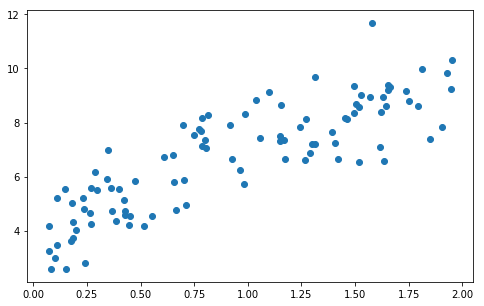

In [10]:
import numpy as np
import matplotlib.pyplot as plt

'''
y = 3x+4 + ノイズ
'''
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.show()

正規方程式を使用して$\hat{\theta}$を計算する  
`np.linalgのinv()`関数を使用して逆行列を計算し、dot()メソッドを使用して乗算を行う

In [11]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[4.0300022 ],
       [2.91542674]])

$y=3x_1+4+ノイズ$なので割と近い

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.0300022 ],
       [9.86085568]])

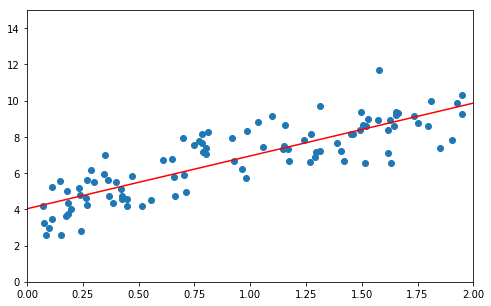

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()

scikit-learnを使用するとこうなる

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([4.0300022]), array([[2.91542674]]))

In [17]:
lin_reg.predict(X_new)

array([[4.0300022 ],
       [9.86085568]])

## 勾配下降法

### バッチ勾配下降法

\begin{equation}
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}\cdot x^{(i)} - y^{(i)})x_j^{(i)}
\end{equation}

この偏微分を個別に計算しなくても以下の式を使用すれば全てまとめて計算できる

\begin{equation}
\nabla_\theta MSE(\theta) =\left(
                                        \begin{array}{c}
                                          \frac{\partial}{\partial \theta_0}MSE(\theta) \\
                                          \frac{\partial}{\partial \theta_1}MSE(\theta)  \\
                                          \vdots \\
                                          \frac{\partial}{\partial \theta_n}MSE(\theta)
                                        \end{array}
                                     \right)
= \frac{2}{m} X^T \cdot (X \cdot \theta - y)
\end{equation}

勾配ベクトルを得たとき、全体として上むきなら、逆方向に下降する  
これは$\theta$から$\nabla_\theta MSE(\theta)$を引くということになる  
ここで学習率$\eta$を使用して勾配を降るステップの間隔を調整する

\begin{equation}
\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)
\end{equation}

In [20]:
eta = 0.1
n_iterations = 1000
m =100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.0300022 ],
       [2.91542674]])

In [32]:
def plot_eta(eta, n_iterations = 1000):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y)
    plt.title('$\eta$: {}'.format(eta))
    
    for iteration in range(n_iterations):
        if iteration < 10:
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
            theta = theta - eta * gradients
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "r-")

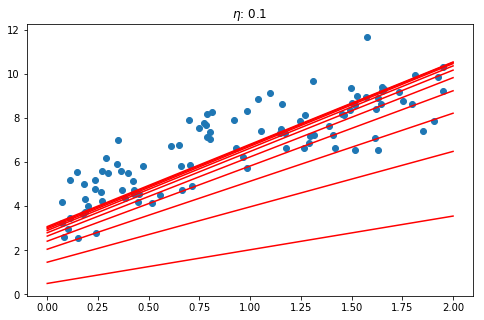

In [33]:
plot_eta(0.1)

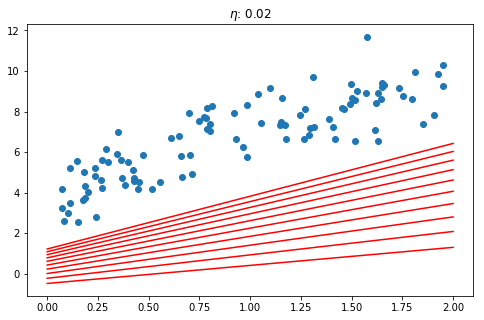

In [34]:
plot_eta(0.02)

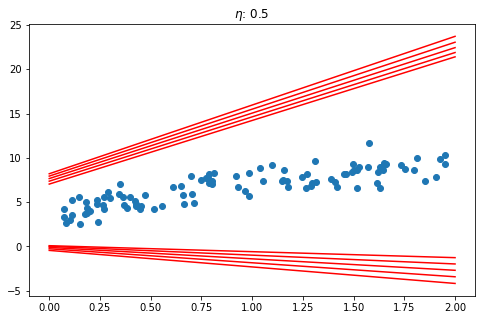

In [35]:
plot_eta(0.5)

### 確率的勾配下降法

In [42]:
m = 100
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [38]:
theta

array([[4.00979506],
       [2.91120852]])

m回にイテレーションを1ラウンドとし、各ラウンドをエポックと呼ぶ  
バッチ勾配下降法は訓練セット全体を計算するのに1000回繰り返したのと比較して、  
確率的勾配下降法は訓練セットを50回繰り返すことでほぼ同じ$\theta$を得ることができた

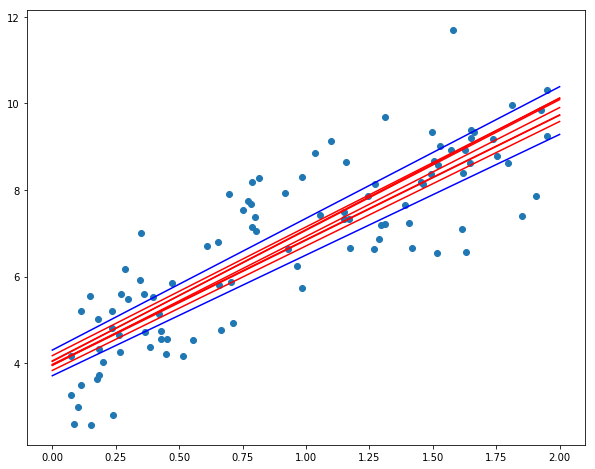

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y)

m = 100
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    if epoch  < 2:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "b-")
    elif 2 < epoch < 10:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")

青線が最初の2回、赤線が最初の3回から10回(徐々に近づいている)